In [1]:
import pandas as pd
import numpy as np
import json


from langdetect import detect
from matplotlib import pyplot as plt

from contextualized_topic_models.models.ctm import ZeroShotTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessing
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("D:\commoncrawl\sample.csv")
df.dropna(inplace=True)
len(df)
# COLUMNS = 'title', 'maintext', 'date_publish', 'language', 'source_domain', 'id'

289518

In [3]:
df_en = pd.read_csv(r"D:\commoncrawl\eng_df_cleaned\england_df_nopunt.csv")
df_en.dropna(inplace=True)
df_en.head()

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year
0,Sadiq Khan castigates Theresa May over Grenfel...,Sadiq Khan has condemned the Governments respo...,2017-06-16 00:00:00,en,www.independent.co.uk,cf350ed295b1ae56c4e90087e0021d8badac1ab10c18bf...,United Kingdom,The Independent,Centre-left,2017.0
1,Kendrick Lamar releases new song and music vid...,Kendrick Lamar has put out two songs in under ...,2017-03-31 00:00:00,en,www.independent.co.uk,e3ed28cb031caa9bd1535e57bd808206514d819e8d11bc...,United Kingdom,The Independent,Centre-left,2017.0
2,Poor telecoms services prevent four million em...,134 Euro and shares rally after Emmanuel Macro...,2017-03-29 00:00:00,en,www.independent.co.uk,5b3210abaa8fcd8216842a4dba262ac1b6adbaf2d76f59...,United Kingdom,The Independent,Centre-left,2017.0
3,Womens World Cup England edge past South Afric...,In a nailbiting semifinal clash that went down...,2017-07-18 00:00:00,en,www.independent.co.uk,cb425bcc0eb72a62008685661aa1bd4a7336f2cc2ab0f2...,United Kingdom,The Independent,Centre-left,2017.0
4,Paul Scholes calls on Manchester United to kee...,Paul Scholes believes Wayne Rooney still has a...,2017-03-26 00:00:00,en,www.independent.co.uk,4408957af0b6a1c8ffee6d02d294c909adecdee7d92b8f...,United Kingdom,The Independent,Centre-left,2017.0


In [4]:
import random
random.seed(42)
sample = random.sample(list(df_en[['maintext', 'id']].to_numpy()), 10000)
documents = {row[1]: row[0][:512] for row in sample}
print(len(documents), "total english documents")

10000 total english documents


In [5]:
sp = WhiteSpacePreprocessing(list(documents.values()), stopwords_language='english')
preprocessed_documents, unpreprocessed_corpus, vocab = sp.preprocess()

In [6]:
tp = TopicModelDataPreparation("distiluse-base-multilingual-cased")

training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

# TODO provare 5 e 8
num_topics = 8
ctm = ZeroShotTM(bow_size=len(tp.vocab), contextual_size=512, n_components=num_topics, num_epochs=20)
ctm.fit(training_dataset) # run the model

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch: [20/20]	 Seen Samples: [200000/200000]	Train Loss: 230.85992985839843	Time: 0:00:12.384996: : 20it [04:12, 12.63s/it]


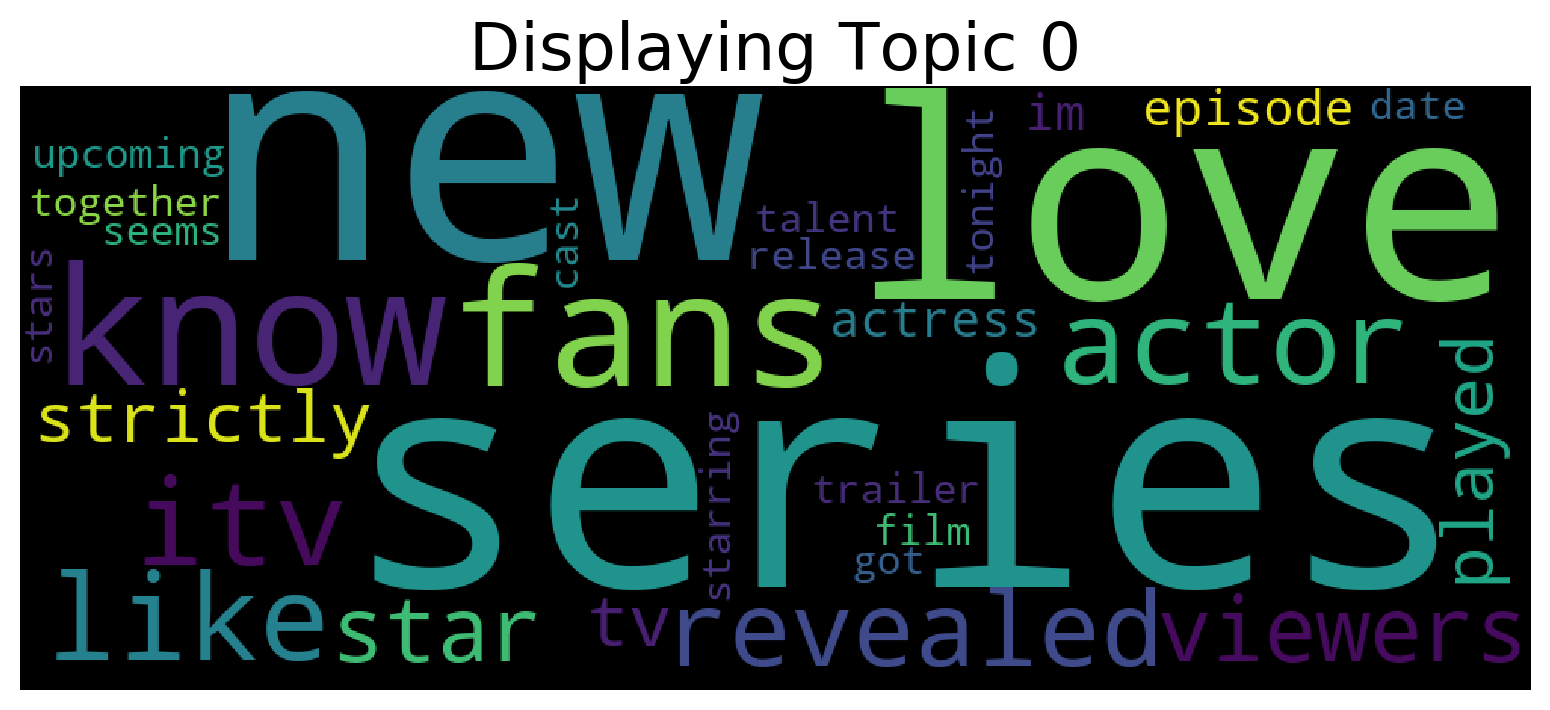

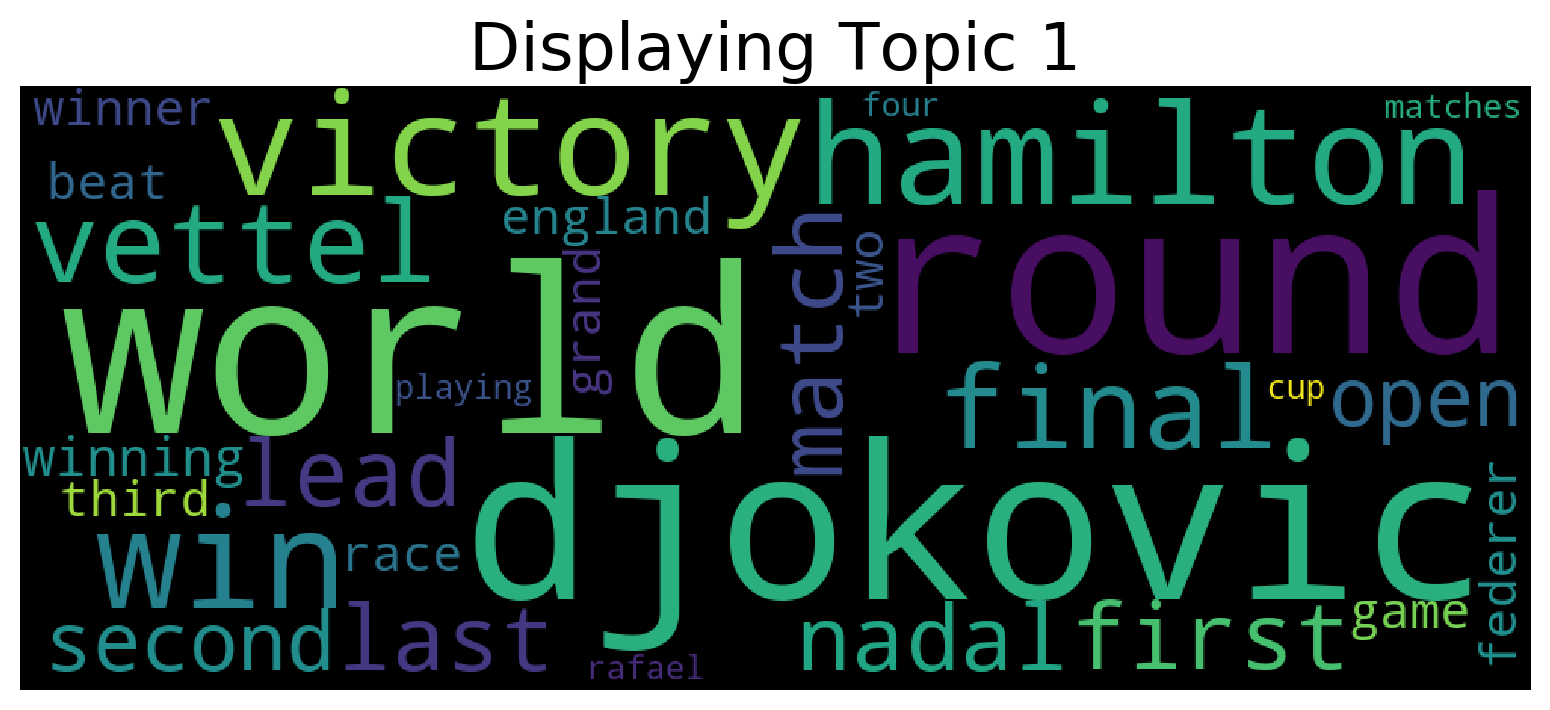

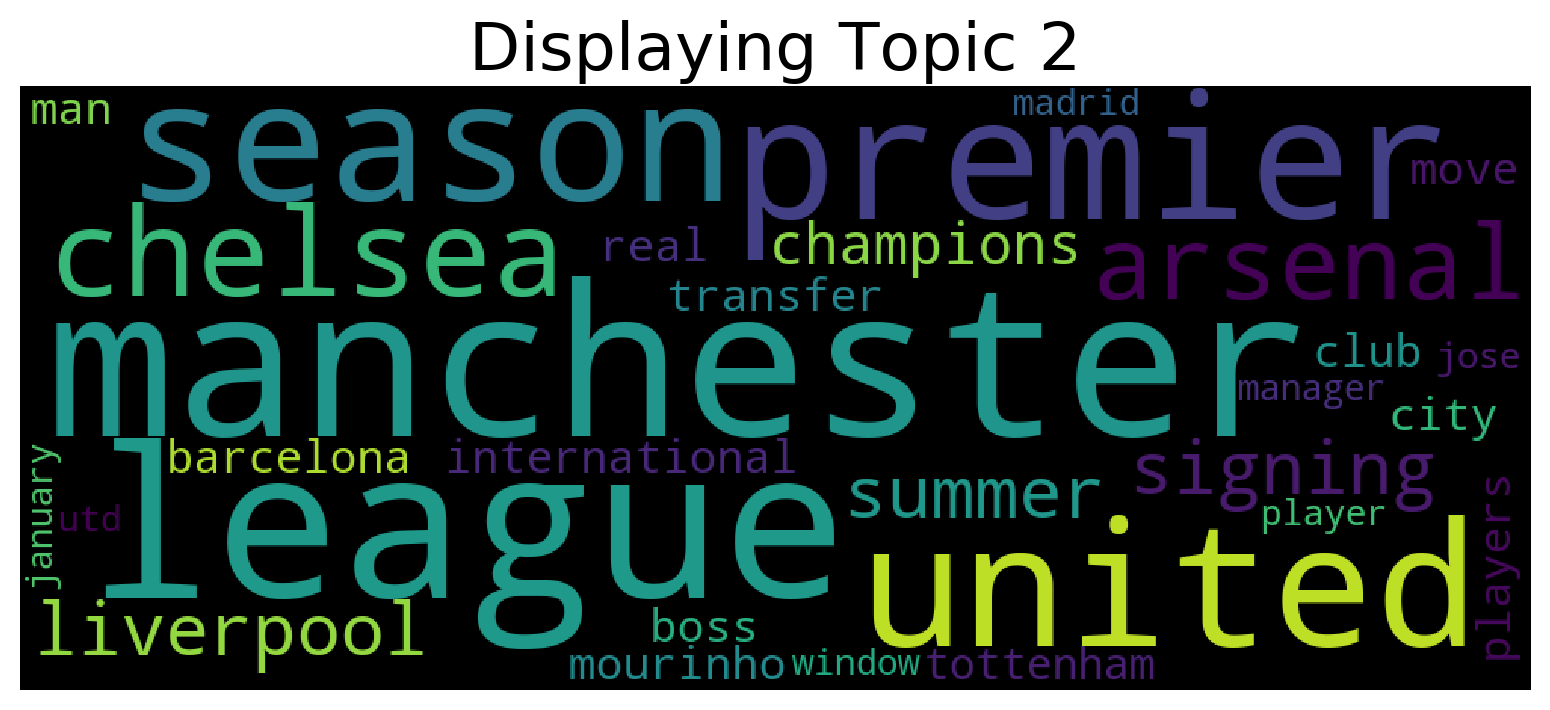

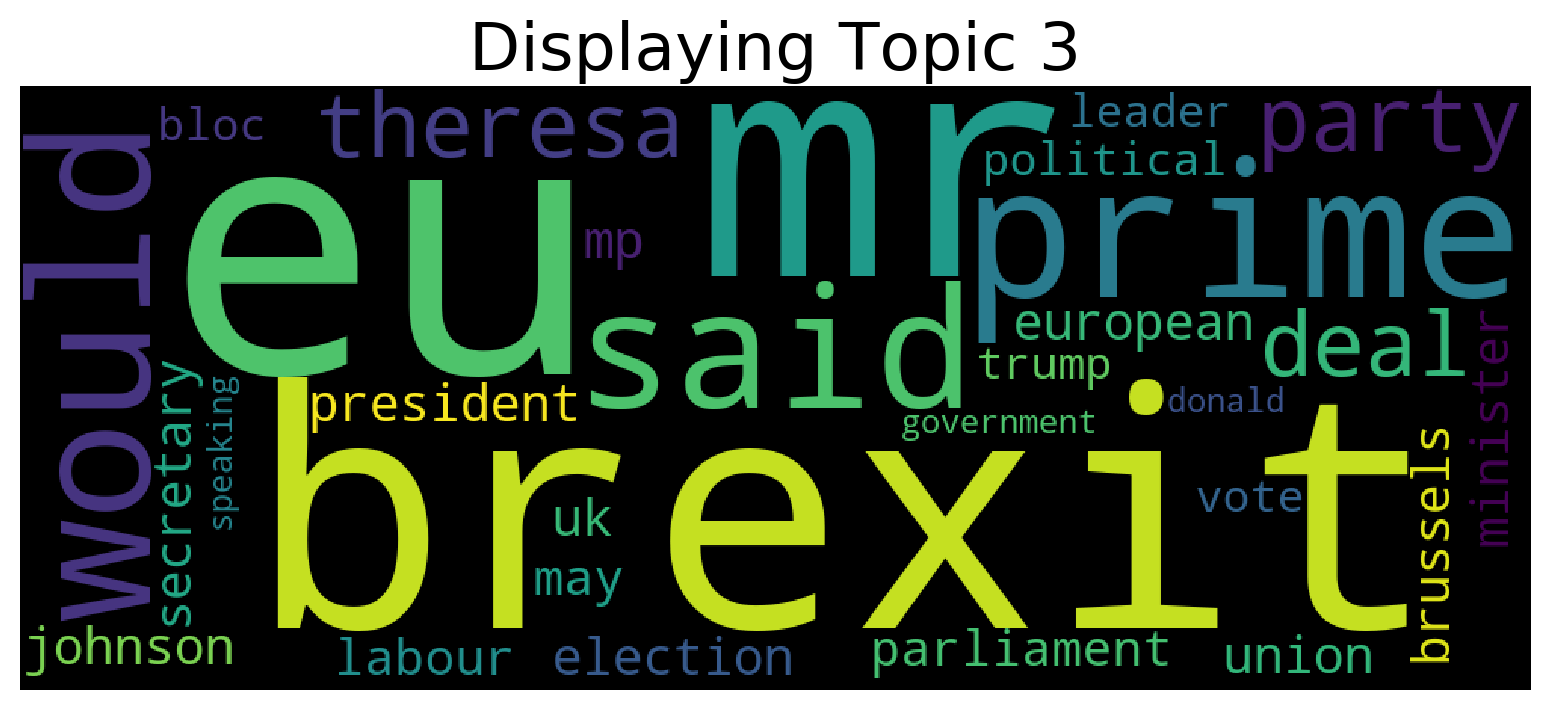

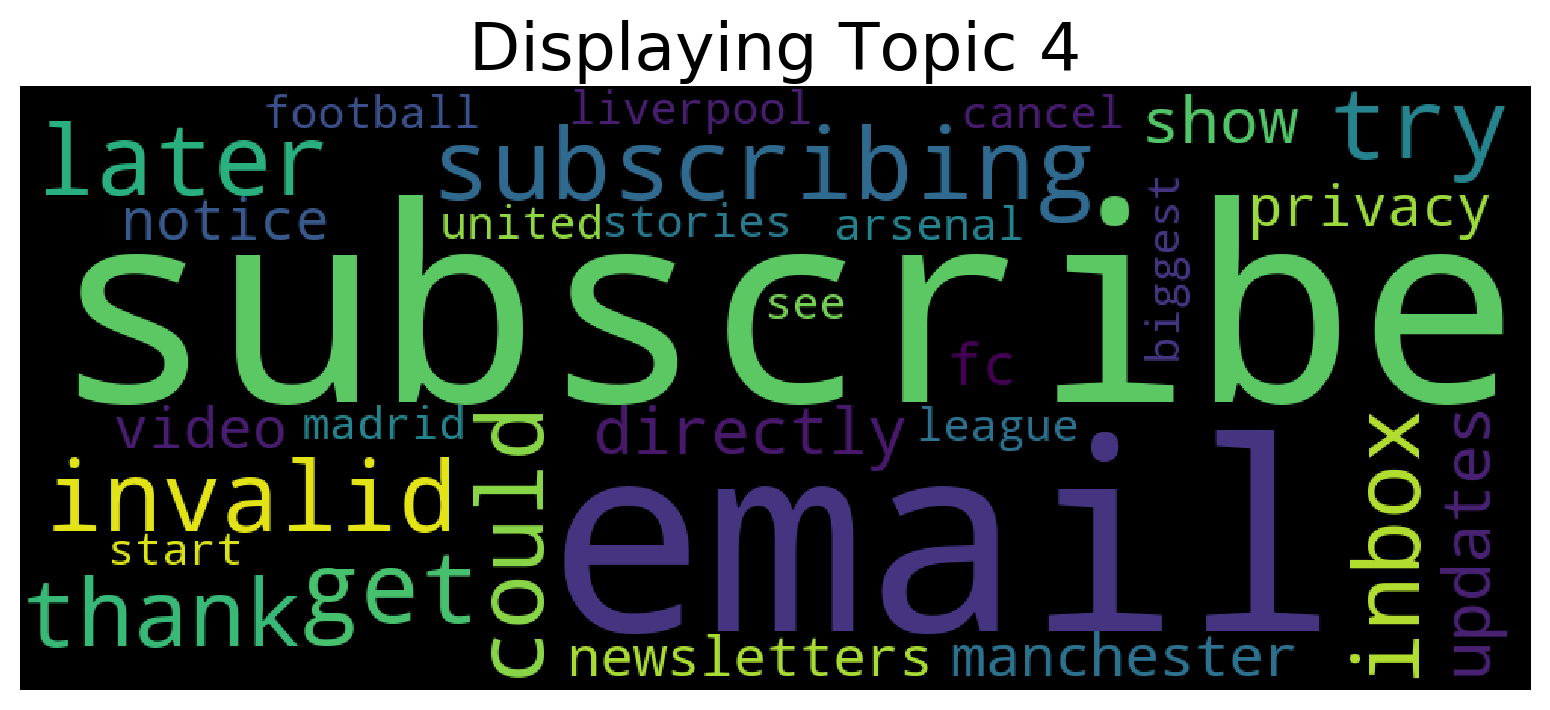

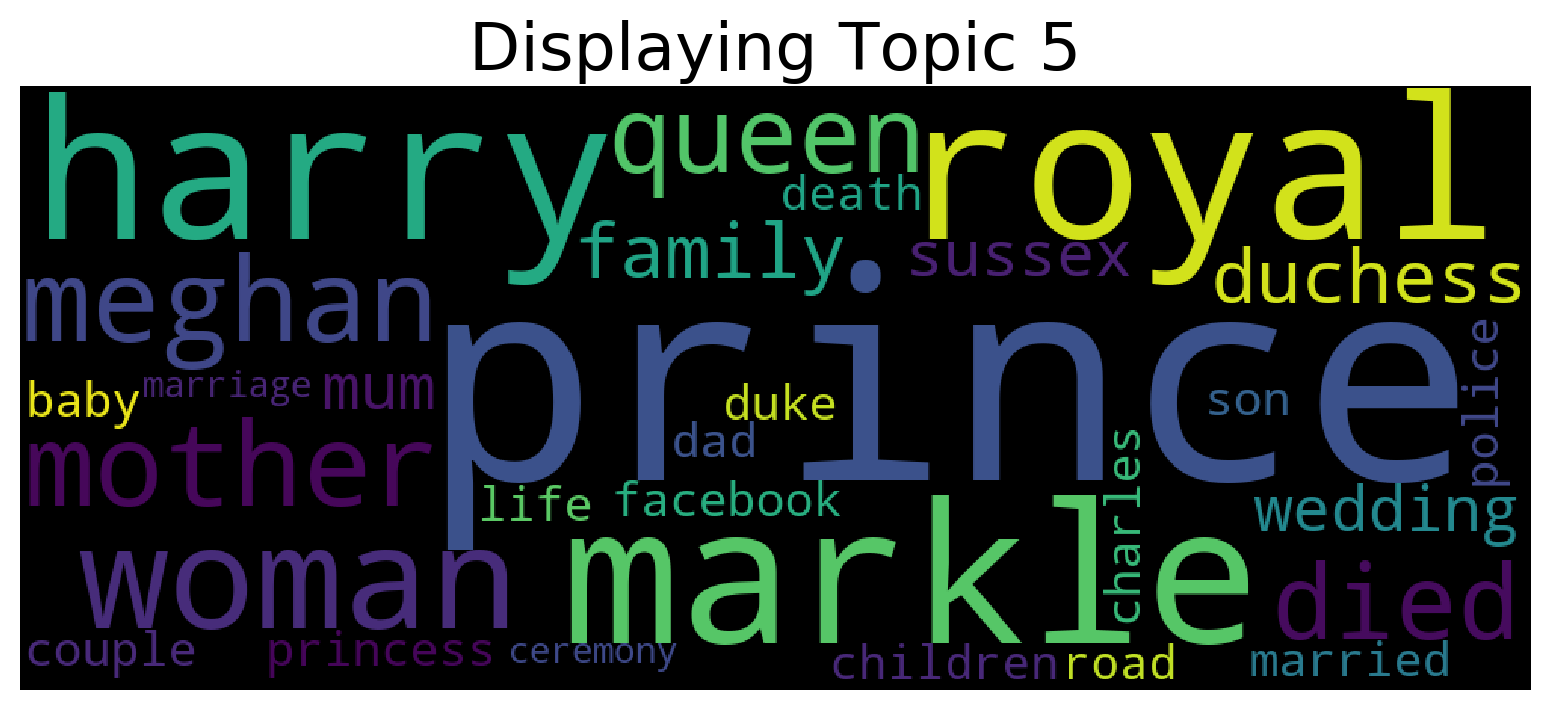

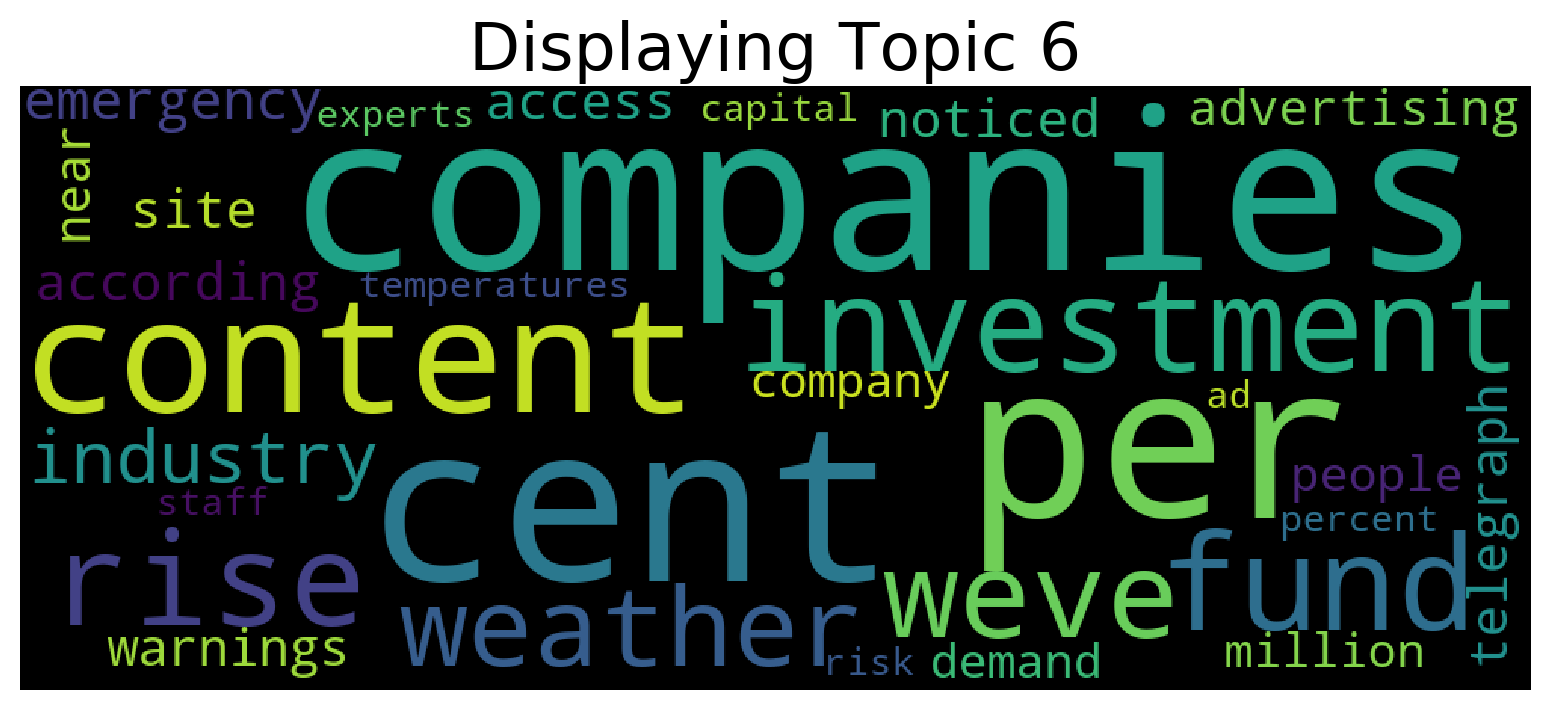

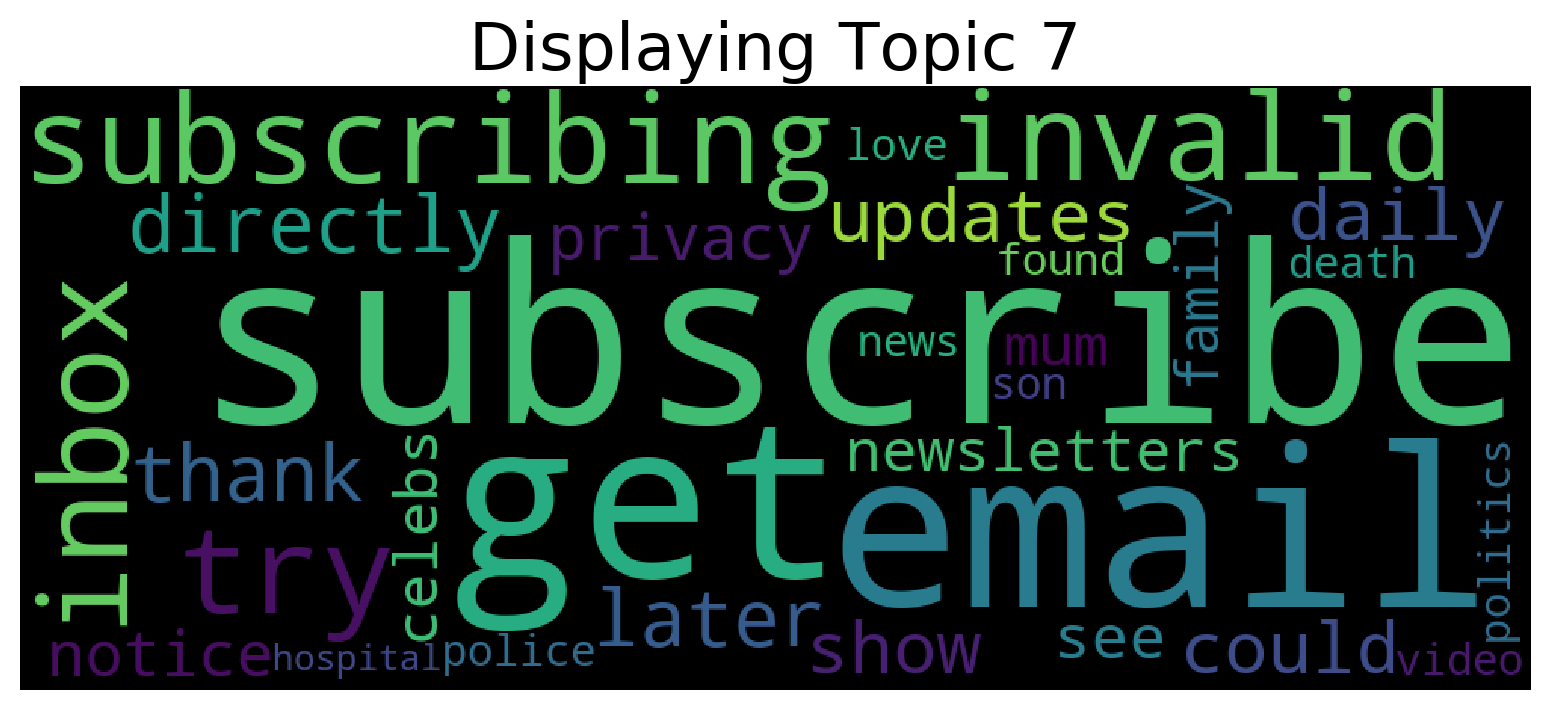

In [7]:
%matplotlib inline
for i in range(num_topics):
    ctm.get_wordcloud(topic_id=i, n_words=30)
    #filename = 'wordclouds/topic{}.png'.format(i)
    #plt.savefig(filename, bbox_inches='tight')

In [8]:
lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=30)

Sampling: [30/30]: : 30it [05:33, 11.12s/it]


In [9]:
import pyLDAvis as vis
movies_pd = vis.prepare(**lda_vis_data)
vis.display(movies_pd)

In [10]:
italian_documents = [a[:512] for a in df[df['language'] == 'it'].maintext if detect(a) == 'it'][:1000]
len(italian_documents)

C:\Users\loren\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000

In [11]:
testing_dataset = tp.transform(italian_documents)
italian_topics_predictions = ctm.get_thetas(testing_dataset, n_samples=5) # get all the topic predictions

C:\Users\loren\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\loren\anaconda3\envs\news\lib\site-packages\contextualized_topic_models\utils\data_preparation.py:84: UserWarning: The method did not have in input the text_for_bow parameter. This IS EXPECTED if you are using ZeroShotTM in a cross-lingual setting
  warnings.warn("The method did not have in input the text_for_bow parameter. This IS EXPECTED if you "


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Sampling: [5/5]: : 5it [00:52, 10.48s/it]


In [12]:
for i in range(0, 50):
    print(italian_documents[i])
    topic_number = np.argmax(italian_topics_predictions[i]) # get the topic id of the first document
    print(ctm.get_topic_lists(10)[topic_number])
    print("==========================================")

|
Essere donna in Corea del Nord significa correre costantemente il rischio di essere abusata sessualmente dalle persone che dovrebbero rappresentare lo Stato: funzionari governativi, pubblici ministeri, soldati, poliziotti. Lo denuncia, in un rapporto di 98 pagine presentato oggi a Seul, Human Rights Watch che ha intervistato 62 nordcoreane che hanno lasciato il Paese dal 2011 ad oggi.
I molestatori possono contare sulla totale impunità:
“Contatto sessuale subito e violenza sono così comuni in Corea del No
['cent', 'companies', 'per', 'content', 'investment', 'fund', 'rise', 'weve', 'weather', 'industry']
|
Dopo il rovinoso intervento delle forze di polizia turche che a Istanbul, sabato 25 agosto, hanno disperso una manifestazione pacifica dei parenti degli scomparsi, Amnesty International ha chiesto l’avvio di indagini immediate, indipendenti ed efficaci sulle denunce relative all’uso non necessario ed eccessivo della forza da parte degli agenti di polizia e ai maltrattamenti inflitt

C:\Users\loren\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
